# Task 3: Convolutional Neural Network
In this task, we are to build multi-class classification models using tensorflow.keras libraries 
on the CIFAR-10 dataset, which consists of 60,000 32x32 colour images in 10 classes, with 6,000 
images per class. There are 50,000 training images and 10,000 test images.

**1. To verify the data, randomly pick 10 images from each of the 10 classes and generate a 
plot similar to the above figure.**

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from sklearn import tree, ensemble, model_selection, metrics, svm, linear_model, metrics
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from random import sample
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras import regularizers

In [ ]:
#Access the Cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
#Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

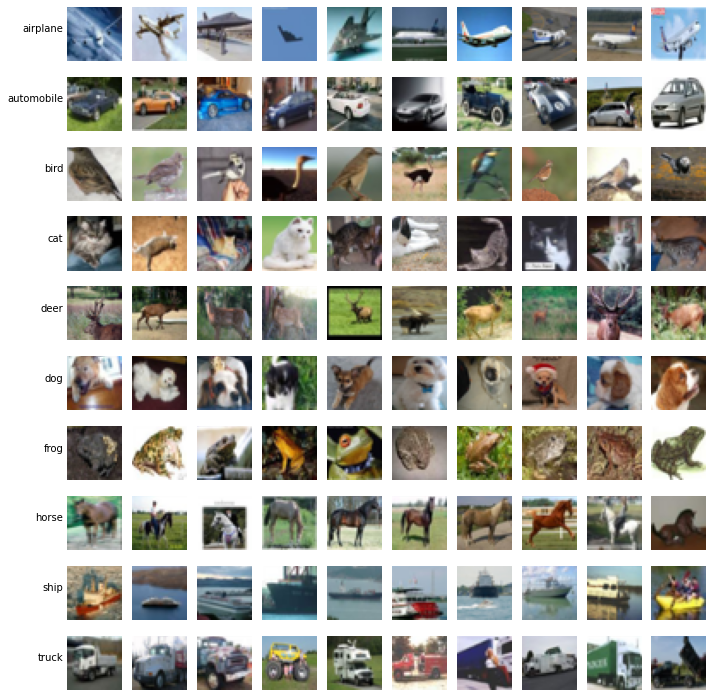

In [ ]:
#Create a grid of pictures to verify dataset
fig, axes = plt.subplots(10, 10, figsize=(10,10),sharey=True)
label_index=0
for row in range(10):
    #select images belonging to a label
    train_im_by_label = train_images[np.isin(train_labels,[label_index]).flatten()]
    #select a random sample of 10 images. 'Sample' method select samples randomly without replacement.
    train_im_sample = [train_im_by_label[i] for i in sample(range(len(train_im_by_label)),10)]
    
    for col in range(10):
        ax =axes[row,col]
        #turn off axis ticks
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
        #turn off spines
        for item in ["left","right","bottom","top"]:
            ax.spines[item].set_visible(False)
        #show ylabel for each class
        if col == 0:
            ax.set_ylabel(class_names[label_index], rotation = 'horizontal', ha='right')
        ax.imshow(train_im_sample[col])
    plt.tight_layout()
    label_index+=1
plt.show()

For each model I am going to use the following settings. You can think of them as contrains that make the task more challenging.
- Set epochs=20
- Use the default batch_size
- Use adam optimizer with default parameter values

To evaluate each model, I will do the followings:
- Generate the confusion matrix on the test set using seaborn.heatmap
- Generate the classification report on the test set using sklearn.metrics.classification_report
- Plot the loss and accuracy curves for both training and validation during the training process

First, let's nomalize the data

In [ ]:
train_images_normalized = train_images / 255.0
test_images_normalized = test_images / 255.0

**2. The first model I'm going to build is a linear model. We can use this model as our base. Let's see if a linear model can perform well on CIFAR-10 dataset**

Below, I create functions of a linear model for multi-class classification:
The model will have an input layer and an output layer. At the output layer, I apply softmax to get the predicted probabilities for classes.

In [ ]:
def create_model(my_learning_rate):
    """Create a linear regression model, an input layer, no hidden layer, an output layer."""

    model = tf.keras.models.Sequential()

    # The features are stored in a three-dimensional 32X32X3 array. 
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

    # Create the output layer with softmax.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Complie the model 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
    return model    

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    return history 

Start training

In [ ]:
# Hyperparameters.
learning_rate = 0.001 #default learning rate
epochs = 20
batch_size = 32 #default batch size
validation_split = 0.2

# Establish the model
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
hist = train_model(my_model, train_images_normalized, train_labels, epochs, batch_size, validation_split)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9789 - accuracy: 0.3080 - val_loss: 1.9769 - val_accuracy: 0.3313
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8809 - accuracy: 0.3504 - val_loss: 1.8592 - val_accuracy: 0.3567
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8552 - accuracy: 0.3639 - val_loss: 1.8861 - val_accuracy: 0.3504
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8427 - accuracy: 0.3668 - val_loss: 1.9671 - val_accuracy: 0.3560
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8293 - accuracy: 0.3743 - val_loss: 1.8970 - val_accuracy: 0.3394
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8152 - accuracy: 0.3780 - val_loss: 1.9704 - val_accuracy: 0.3131
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.8082 - accuracy: 0.3819 - val_loss: 1.8824 - val_accuracy:

Confusion matrix for test set

In [ ]:
# Get predicted classes for test data
predict_test = my_model.predict(test_images_normalized)
pred_classes_test=np.argmax(predict_test,axis=1)
# Create confusion matrix
cf_matrix = confusion_matrix(test_labels, pred_classes_test)

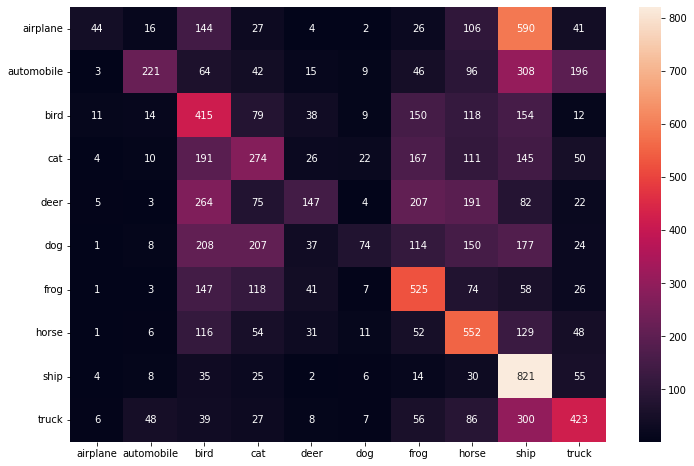

In [ ]:
# Visualize confusion matrix for test data by seaborn heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
ax.set_yticklabels(class_names, rotation = 'horizontal')
ax.set_xticklabels(class_names, rotation = 'horizontal')
plt.show()

It can be seen from the confusion matrix that the most confusing classes for the model are airplane and ship. In addition, the model gets confused between deer and frog, deer and bird, deer and frog, frog and cat, automobile and ship, as well as truck and ship. Basically, the model is likely to get confused between animals themselves and vehicles themselves.

The primary reason is that animals themselves or vehicles themselves have things in common. For examples, dog and cat both have two big eyes and 4 legs. Ships and airplane both have long bodies. If the model learns to associate a specific characteristic to an animal A, it can easily confuse animals that also have the characteristic with the animal A. 

In our case, according to the confusion matrix above, it seems that the model has learned a specific characteristic and associate it to ship. When the characteristic also exists in airplane and automobile, the model classify those types of vehicles to ship and not the vice versa.

In order to classify better, the model has to learn that specific characteristic in a more generalized way. 
Unfortunately, with a simple architecture of no hiddenlayer, characteristics are not likely to be generalized.  

Airplane (actual label = 0) but classified as ship (predicted label = 8)


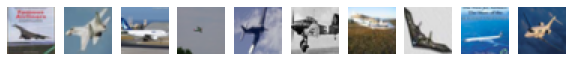

In [ ]:
# Examine images classified incorrectly
print("Airplane (actual label = 0) but classified as ship (predicted label = 8)")
wrong_predictions = test_images[(pred_classes_test == np.array([8]*len(pred_classes_test))) & (test_labels.flatten() == np.array([0]*len(test_labels)))]
fig, axes = plt.subplots(1, 10, figsize=(10,10))
for col in range(10):
    ax = axes[col]
    ax.axis('off')
    ax.imshow(wrong_predictions[col])
plt.show()

Automobile (actual label = 1) but classified as ship (predicted label = 8)


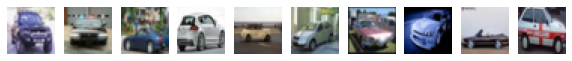

In [ ]:
print("Automobile (actual label = 1) but classified as ship (predicted label = 8)")
wrong_predictions = test_images[(pred_classes_test == np.array([8]*len(pred_classes_test))) & (test_labels.flatten() == np.array([1]*len(test_labels)))]
fig, axes = plt.subplots(1, 10, figsize=(10,10))
for col in range(10):
    ax = axes[col]
    ax.axis('off')
    ax.imshow(wrong_predictions[col])
plt.show()

In [ ]:
#Generate the classification report on the test set
print(classification_report(test_labels, pred_classes_test, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.55      0.04      0.08      1000
  automobile       0.66      0.22      0.33      1000
        bird       0.26      0.41      0.32      1000
         cat       0.30      0.27      0.28      1000
        deer       0.42      0.15      0.22      1000
         dog       0.49      0.07      0.13      1000
        frog       0.39      0.53      0.45      1000
       horse       0.36      0.55      0.44      1000
        ship       0.30      0.82      0.44      1000
       truck       0.47      0.42      0.45      1000

    accuracy                           0.35     10000
   macro avg       0.42      0.35      0.31     10000
weighted avg       0.42      0.35      0.31     10000



Plot the loss and accuracy curves for both training and validation during the training process

In [ ]:
# Create a function to plot loss and accuracy
def plot_curve(hist):
    """Plot a curve of one or more classification metrics vs. epoch."""  
    epochs = hist.epoch
    f, ax = plt.subplots(ncols=2, figsize=(15,6))
    # Loss
    ax[0].plot(epochs, hist.history['loss'], label='Training Loss')
    ax[0].plot(epochs, hist.history['val_loss'], label='Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend()
    ax[0].set_xticks(range(21))
    min_0 = min(min(hist.history['loss']),min(hist.history['val_loss']))
    max_0 = max(max(hist.history['loss']),max(hist.history['val_loss']))
    ax[0].set_ylim([min_0*0.95, max_0 * 1.1])
    # Accuracy
    ax[1].plot(epochs, hist.history['accuracy'], label='Training Accuracy')
    ax[1].plot(epochs, hist.history['val_accuracy'], label='Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    ax[1].set_xticks(range(21))
    min_1 = min(min(hist.history['accuracy']),min(hist.history['val_accuracy']))
    max_1 = max(max(hist.history['accuracy']),max(hist.history['val_accuracy']))
    ax[1].set_ylim([min_1*0.95, max_1 * 1.1])

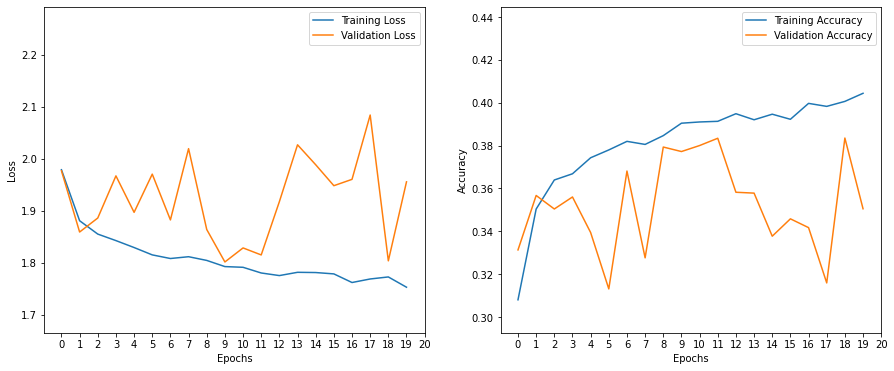

In [ ]:
plot_curve(hist)

The model is overfitting since the performance on validata data is lower than on training data and their difference tends to become larger after each epoch. While the training loss on training data is gradually and constantly optimized, the training loss on validation data is not stable. 

**3. Next, I build a deeper model using three hidden layers with number of neurons in (512, 256, 512) 
and use the rectified linear unit as the activation function. Let's see if we can achieve a better result**

Create functions of deep model for multi-class classification: there are 3 hidden layers [512,256,512]

In [ ]:
def create_model(my_learning_rate):
    """Create a linear regression model, 3 hidden layers (512, 256, 512)."""

    # All models in this course are sequential.
    model = tf.keras.models.Sequential()

    # The features are stored in a three-dimensional 32X32X3 array. 
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
    
    # Create 3 hidden layers (512, 256, 512)
    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    model.add(tf.keras.layers.Dense(units=216, activation='relu'))
    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    
    # Create the output layer with softmax.
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Complie the model 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
    return model    

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    return history 

Start training

In [ ]:
# Hyperparameters.
learning_rate = 0.001 #default learning rate
epochs = 20
batch_size = 32 #default batch size
validation_split = 0.2

# Establish the model
my_model_2 = create_model(learning_rate)

# Train the model on the normalized training set.
hist = train_model(my_model_2, train_images_normalized, train_labels, epochs, batch_size, validation_split)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8837 - accuracy: 0.3078 - val_loss: 1.7710 - val_accuracy: 0.3550
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7064 - accuracy: 0.3842 - val_loss: 1.7203 - val_accuracy: 0.3814
Epoch 3/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6202 - accuracy: 0.4166 - val_loss: 1.6591 - val_accuracy: 0.4138
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5620 - accuracy: 0.4372 - val_loss: 1.5516 - val_accuracy: 0.4469
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5223 - accuracy: 0.4528 - val_loss: 1.5917 - val_accuracy: 0.4248
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4915 - accuracy: 0.4628 - val_loss: 1.5397 - val_accuracy: 0.4511
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4537 - accuracy: 0.4756 - val_loss: 1.5532 - val_accuracy:

Confusion matrix for test set

In [ ]:
# Get predicted classes for test data
predict_test = my_model_2.predict(test_images_normalized)
pred_classes_test=np.argmax(predict_test,axis=1)
# Create confusion matrix
cf_matrix = confusion_matrix(test_labels, pred_classes_test)

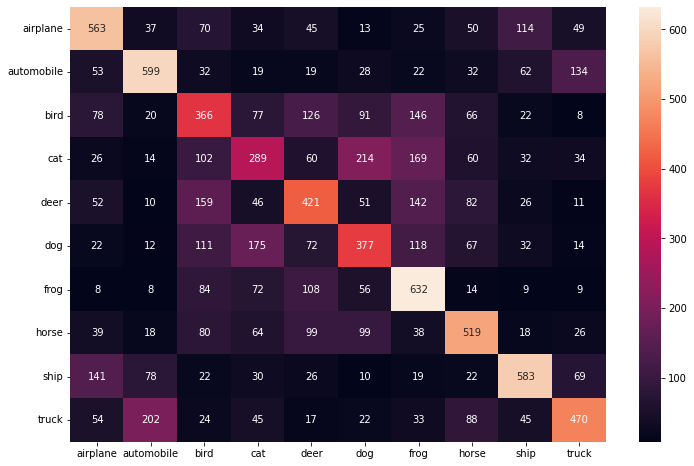

In [ ]:
# Visualize confusion matrix by seaborn heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
ax.set_yticklabels(class_names, rotation = 'horizontal')
ax.set_xticklabels(class_names, rotation = 'horizontal')
plt.show()

In [ ]:
#Generate the classification report on the test set
print(classification_report(test_labels, pred_classes_test, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.54      0.56      0.55      1000
  automobile       0.60      0.60      0.60      1000
        bird       0.35      0.37      0.36      1000
         cat       0.34      0.29      0.31      1000
        deer       0.42      0.42      0.42      1000
         dog       0.39      0.38      0.38      1000
        frog       0.47      0.63      0.54      1000
       horse       0.52      0.52      0.52      1000
        ship       0.62      0.58      0.60      1000
       truck       0.57      0.47      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000



It can be clearly seen that the deep model has a better performance than the previous linear model. However, the improvement is not considerable. The precision and recall, both increase only 6 percentage points, from 42% to 48%. Overall, this performance is not good for a classifier. We see that the model still confuses ship with airplane and truck with motobile. Therefore, we need a deeper architecture for the model to learn more effectively

Plot the loss and accuracy curves for both training and validation during the training process

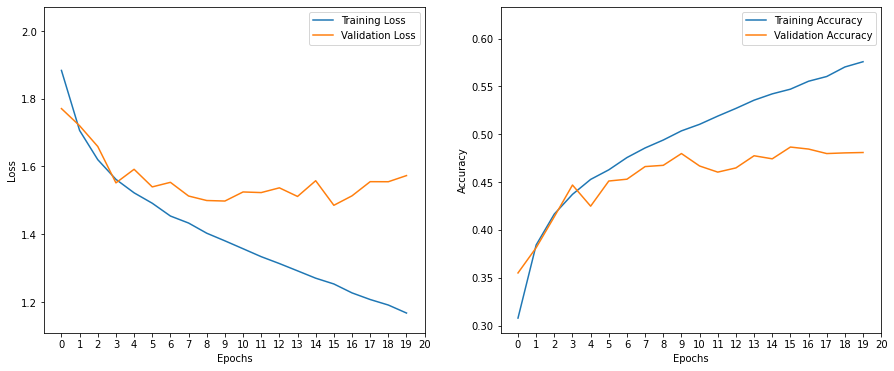

In [ ]:
plot_curve(hist)

We are able to obtain a more stable performance on validation dataset with this deep model. Nevertheless, this model is still overfitting. 

**4. Let's design a convolutional neural network to achieve 80%+ macro accuracy on the test set.**

Create functions of convolution neural network model for multi-class classification. 

This deep model has 9 layers:
(2 convoluted filter 2D + 1 Maxpooling) x 3

To overcome the overfitting issue, we apply regularization l2 with C = 0.0001 at each layer. In addition, drop out rate of 0.2 also is applied at certain layers.

In [ ]:
def create_model(my_learning_rate):
    """Create a linear regression model."""

    # All models in this course are sequential.
    model = tf.keras.models.Sequential()

    # Create convolutional layers
    # First+ Second + Third Conv layer
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4)))

    model.add(MaxPooling2D(pool_size=(2,2))) 
    
    # Forth + Fifth + Sixth layer
    model.add(Conv2D(64,(3,3),padding='same',activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64,(3,3),padding='same',activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # Seventh + Eighth + Ninth layer
    model.add(Conv2D(128,(3,3),padding='same',activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    # Create the output layer with softmax.
    model.add(Flatten())
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     

    # Complie the model 
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
    return model    

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    """Train the model by feeding it data."""

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    return history 

Start training

In [ ]:
# Hyperparameters.
learning_rate = 0.001 #default learning rate
epochs = 20
batch_size = 32 #default batch size
validation_split = 0.2

# Establish the model
my_model_3 = create_model(learning_rate)

# Train the model on the normalized training set.
hist = train_model(my_model_3, train_images_normalized, train_labels, epochs, batch_size, validation_split)

Epoch 1/20
1250/1250 [==============================] - 18s 7ms/step - loss: 1.6109 - accuracy: 0.4260 - val_loss: 1.2774 - val_accuracy: 0.5623
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1649 - accuracy: 0.6019 - val_loss: 1.0491 - val_accuracy: 0.6463
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.9822 - accuracy: 0.6733 - val_loss: 0.9495 - val_accuracy: 0.6854
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8844 - accuracy: 0.7088 - val_loss: 0.9065 - val_accuracy: 0.7051
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8095 - accuracy: 0.7412 - val_loss: 0.8289 - val_accuracy: 0.7382
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7592 - accuracy: 0.7628 - val_loss: 0.7966 - val_accuracy: 0.7529
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7214 - accuracy: 0.7780 - val_loss: 0.7687 - val_accuracy

Confusion matrix for test set

In [ ]:
# Get predicted classes for test data
predict_test = my_model_3.predict(test_images_normalized)
pred_classes_test=np.argmax(predict_test,axis=1)
# Create confusion matrix
cf_matrix = confusion_matrix(test_labels, pred_classes_test)

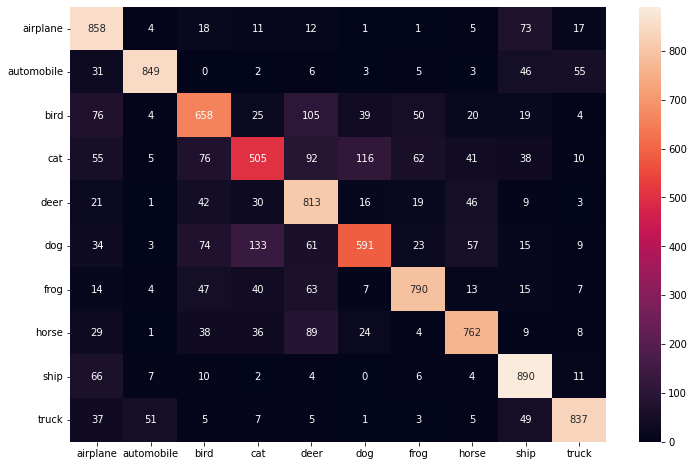

In [ ]:
# Visualize confusion matrix by seaborn heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
ax.set_yticklabels(class_names, rotation = 'horizontal')
ax.set_xticklabels(class_names, rotation = 'horizontal')
plt.show()

In [ ]:
#Generate the classification report on the test set
print(classification_report(test_labels, pred_classes_test, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.70      0.86      0.77      1000
  automobile       0.91      0.85      0.88      1000
        bird       0.68      0.66      0.67      1000
         cat       0.64      0.51      0.56      1000
        deer       0.65      0.81      0.72      1000
         dog       0.74      0.59      0.66      1000
        frog       0.82      0.79      0.80      1000
       horse       0.80      0.76      0.78      1000
        ship       0.77      0.89      0.82      1000
       truck       0.87      0.84      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



In [ ]:
# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
result = my_model_3.evaluate(x=test_images_normalized, y=test_labels, batch_size=batch_size)


 Evaluate the new model against the test set:
313/313 [==============================] - 1s 4ms/step - loss: 0.9004 - accuracy: 0.7553


With this deep model with 9 layers, we are able to achieve an accuracy of 76% on the test dataset

To improve the model performance further, we'll use a technique called data augmentation. This technique artificially generates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.

In [ ]:
# To generate new images, we will use 80% of the training dataset as input for our image generator.
# First, we split the training dataset into train and validation sets. 
x_train, x_val, y_train, y_val = model_selection.train_test_split(train_images_normalized, train_labels, test_size=0.2)

In [ ]:
# Call the generator and fit the generator to input data
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
# Fit the trained CNN model to artificial data.
history = my_model_3.fit(datagen.flow(x_train, y_train, batch_size = batch_size),
                    steps_per_epoch = len(x_train) // batch_size , 
                    epochs = epochs, 
                    validation_data= (x_val,  y_val),
                    verbose=1)

Epoch 1/20
1250/1250 [==============================] - 24s 19ms/step - loss: 0.9044 - accuracy: 0.7395 - val_loss: 0.6475 - val_accuracy: 0.8320
Epoch 2/20
1250/1250 [==============================] - 23s 18ms/step - loss: 0.8585 - accuracy: 0.7529 - val_loss: 0.6613 - val_accuracy: 0.8284
Epoch 3/20
1250/1250 [==============================] - 23s 19ms/step - loss: 0.8330 - accuracy: 0.7626 - val_loss: 0.6202 - val_accuracy: 0.8378
Epoch 4/20
1250/1250 [==============================] - 23s 19ms/step - loss: 0.8158 - accuracy: 0.7656 - val_loss: 0.6515 - val_accuracy: 0.8264
Epoch 5/20
1250/1250 [==============================] - 23s 18ms/step - loss: 0.8083 - accuracy: 0.7670 - val_loss: 0.6837 - val_accuracy: 0.8111
Epoch 6/20
1250/1250 [==============================] - 23s 19ms/step - loss: 0.7984 - accuracy: 0.7730 - val_loss: 0.6590 - val_accuracy: 0.8198
Epoch 7/20
1250/1250 [==============================] - 23s 19ms/step - loss: 0.7936 - accuracy: 0.7734 - val_loss: 0.6469 -

In [ ]:
# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
result = my_model_3.evaluate(x=test_images_normalized, y=test_labels, batch_size=batch_size)


 Evaluate the new model against the test set:
313/313 [==============================] - 1s 4ms/step - loss: 0.6916 - accuracy: 0.8143


We can see that the model performance improved from 76% to 81%.

Plot the loss and accuracy curves for both training and validation during the training process

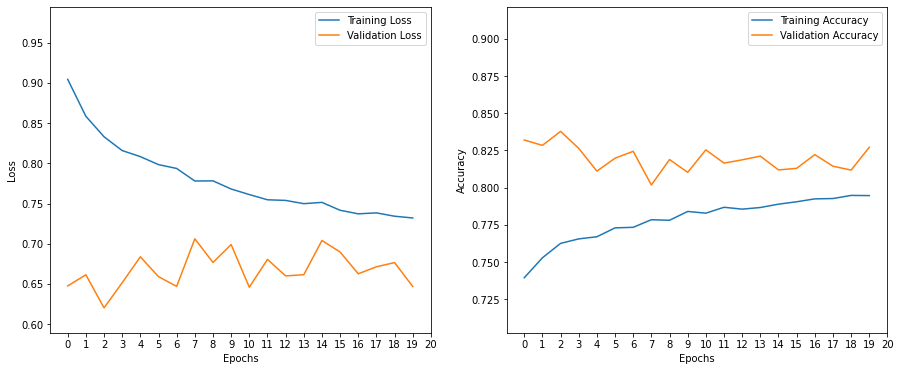

In [ ]:
plot_curve(history)

We can see that the model is not over-fitting.

In [ ]:
# CNN model summary
my_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [ ]:
# FNN model summary
my_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1573376   
                                                                 
 dense_3 (Dense)             (None, 216)               110808    
                                                                 
 dense_4 (Dense)             (None, 512)               111104    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,800,418
Trainable params: 1,800,418
Non-trainable params: 0
_________________________________________________________________


CNN has 307k parameters to be trained. it is one-sixth the number of trainable parameters in the FNN model.
